<a href="https://colab.research.google.com/github/jlidmar/cmplx/blob/master/R%C3%B6ssler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rössler system:
 
\begin{align}
    \frac{dx}{dt} &= - y - z \\
    \frac{dy}{dt} &= x + a y \\
    \frac{dz}{dt} &= b - c z + xz
\end{align}


In [0]:
from numpy import *
from scipy import integrate
from matplotlib import pyplot as plt

In [0]:
#@title Enter a value for c:

a, b, c = 0.2, 0.2, 4.16

c = 3 #@param ["3", "3.9", "4", "4.11", "4.16"] {type:"raw", allow-input: true}



def Roessler(t,x):
    "Lorenz system of equations"
    return [ -x[1]-x[2], x[0]+a*x[1], b-c*x[2]+x[0]*x[2]]

### Calculate Poincaré map numerically:

In [0]:
def poincare_section(t,x):
  return x[1]

poincare_section.direction = +1.0

In [0]:
t = [0.0, 1000.0];

x = array([1, 1, 1])

sol = integrate.solve_ivp(Roessler,t,x,dense_output=True,rtol=0.00001, events=poincare_section)


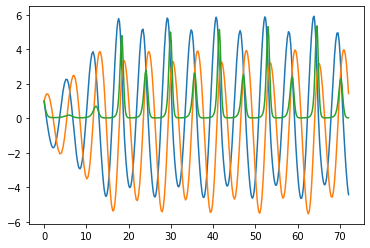

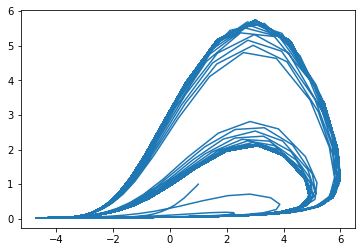

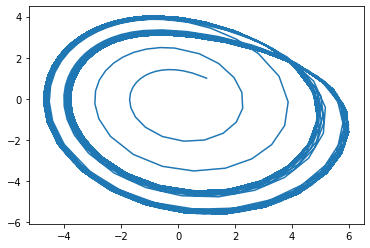

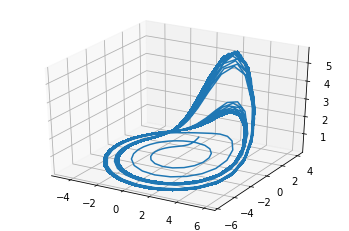

In [66]:
ts = sol.t
xs = sol.y

plt.plot(ts[0:400],xs.transpose()[0:400]);
plt.figure()
plt.plot(xs[0],xs[2])
plt.figure()
plt.plot(xs[0],xs[1])

from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca(projection='3d')
# plt.plot(xs[0], xs[1], xs[2]);
plt.plot(*xs);

## Plot a limit cycle

... skipping the initial transient

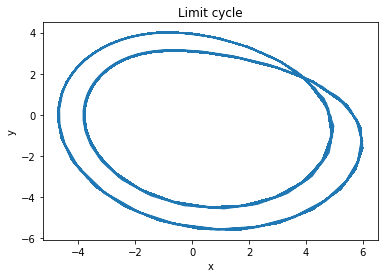

In [69]:
skip = 400

plt.plot(xs[0,skip:],xs[1,skip:]);
plt.xlabel("x")
plt.ylabel("y")
plt.title("Limit cycle");

## Plot the Poincaré map in the xz-plane:

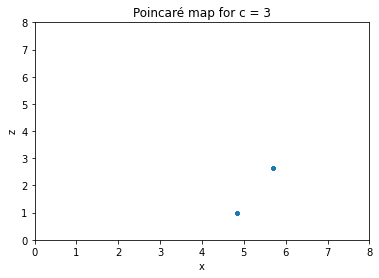

In [74]:
#@title
skip = 50 # skip the initial transient

Poincare_map_x = sol.y_events[0][:,0]
Poincare_map_z = sol.y_events[0][:,2]

plt.plot(Poincare_map_x[skip:], Poincare_map_z[skip:],'.');
plt.axis([0,8,0,8]);
plt.xlabel("x")
plt.ylabel("z")
plt.title("Poincaré map for c = " + str(c));